# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [3]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
boston_h = pd.read_csv('../data/boston_data.csv')
boston_h.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [5]:
Q1 = boston_h.quantile(0.25)
Q3 = boston_h.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

crim         3.970775
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.178000
rm           0.726500
age         48.350000
dis          3.134250
rad         20.000000
tax        385.000000
ptratio      2.825000
black       21.297500
lstat        9.775000
medv         7.900000
dtype: float64


In [6]:
boston_h = boston_h[~((boston_h < (Q1 - 1.5 * IQR)) | (boston_h > (Q3 + 1.5 * IQR)))]
boston_h

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,NaN,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,NaN,10.11,15.0
401,0.01501,NaN,1.21,NaN,0.401,NaN,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,NaN
402,0.02055,NaN,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [7]:
boston_h.isna().sum()

crim       42
zn         49
indus       0
chas       28
nox         0
rm         21
age         0
dis         5
rad         0
tax         0
ptratio    12
black      61
lstat       2
medv       27
dtype: int64

In [8]:
boston_h = boston_h.fillna(boston_h.mean())

In [9]:
boston_h.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

<Figure size 576x576 with 0 Axes>

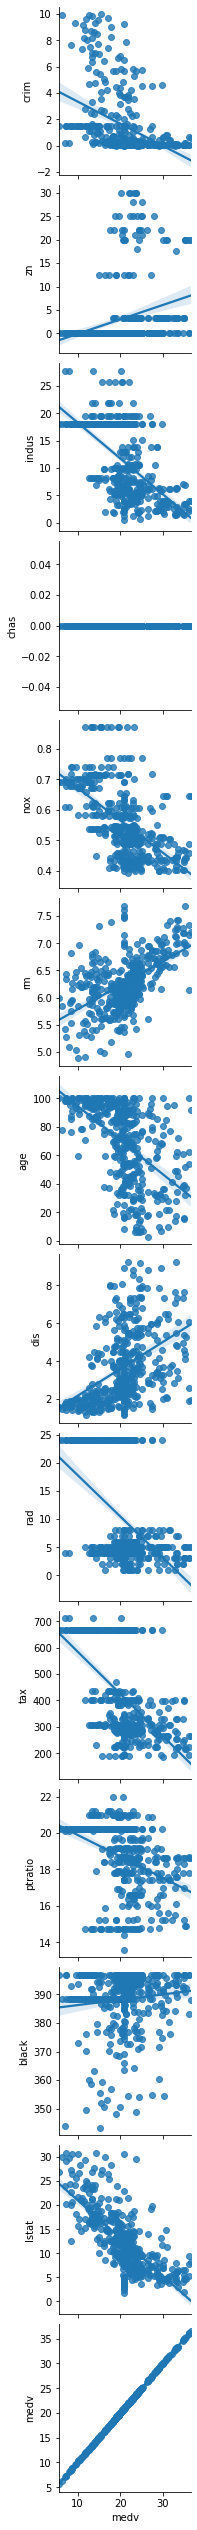

In [10]:
# Your plots here
import seaborn as sns

plt.figure(figsize = (8,8))
boston_h_pairplot = sns.pairplot(data=boston_h,
                                x_vars='medv',
                                y_vars=boston_h.columns,
                                kind='reg')
boston_h_pairplot

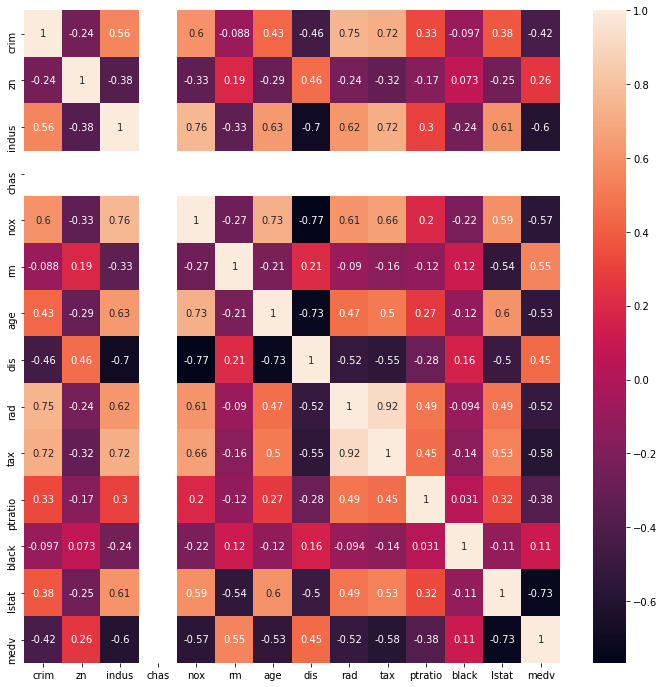

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
sns.heatmap(boston_h.corr(), annot=True)
plt.show()

In [18]:
corr_medv = boston_h.corrwith(boston_h['medv'])[:-1]

In [20]:
corr_medv

crim      -0.424296
zn         0.259638
indus     -0.600331
chas            NaN
nox       -0.565672
rm         0.547834
age       -0.533189
dis        0.453674
rad       -0.518337
tax       -0.583879
ptratio   -0.384183
black      0.110080
lstat     -0.726922
dtype: float64

In [22]:
corr_medv_abs = pd.DataFrame(corr_medv.abs(),columns=['corr'])
corr_medv_abs[corr_medv_abs['corr']>0.7]

,corr
lstat,0.726922


In [ ]:
# The most correlated column of the DataFrame is lstat with negative 0.7426954940642158 correlation

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [23]:
# Your response here
# The lower lstat, the higher the price
# And the higher the rm, the higher the price

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [24]:
corr_medv_abs[corr_medv_abs['corr']<0.3]

,corr
zn,0.259638
black,0.110080


In [25]:
# Your response here
# The least correlated variables are chas and dis both with an absolute correlation lower than 0.3

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [27]:
# Your code here
boston_h.describe()['medv']

count    404.000000
mean      20.841379
std        6.229748
min        5.600000
25%       17.200000
50%       20.841379
75%       23.900000
max       36.500000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [28]:
from sklearn.metrics import r2_score, accuracy_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return accuracy_score(y_true, y_predict), r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [31]:
# Your code here
from sklearn.model_selection import train_test_split

y = boston_h['medv']
X = boston_h.drop(labels='medv', axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [34]:
# Five separate RFR here with the given max depths
rf_gs = GridSearchCV(estimator=RandomForestRegressor(),
                             param_grid={"max_depth":[2, 4, 6, 8, 10]},
                             scoring='r2',
                             cv=5
                             )

In [35]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10]}, scoring='r2')

Now, plot the score for each tree on the training set and on the testing set.

<AxesSubplot:>

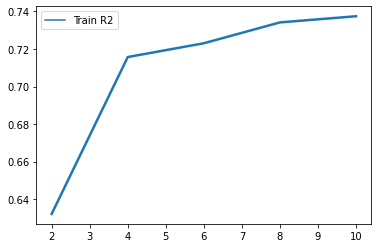

In [37]:
# Produce a plot with the score for the testing and training for the different max depths
rf_gs_results = rf_gs.cv_results_
    
results = pd.DataFrame(rf_gs_results['mean_test_score'], 
                       columns=['Train R2'], 
                       index = rf_gs.param_grid['max_depth'])
 
sns.lineplot(data=results, linewidth=2.5)

In [39]:
results['Train R2'].idxmax()

10

In [40]:
sorted(zip(rf_gs_results['mean_test_score'], rf_gs_results['params']), reverse = True)

[(0.7374236781863194, {'max_depth': 10}),
 (0.7341410592830423, {'max_depth': 8}),
 (0.7230386678608045, {'max_depth': 6}),
 (0.7156920222090773, {'max_depth': 4}),
 (0.632155664513827, {'max_depth': 2})]

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here: The bigger the depth, the better the results.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
# With a maximum depth of 1 the model will have high bias
# With a maximun depth of 10 the model will have high variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [41]:
# Your response here
# From 4 to 10 there is not a significative difference, so something along those lines

In [42]:
rf_gs.best_estimator_

RandomForestRegressor(max_depth=10)

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
# Not much since the city can change a lot in that many years
# There are characteristics that are much more related to the price than the ones considered in the dataset
# There is not any strongly correlated asset and the amount of data considered is not enough to make a robus model
# No, the area where the house is located is a very important factor